In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    weight = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(weight, inputs) + biases;
    if activation_function == None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return(output)
    

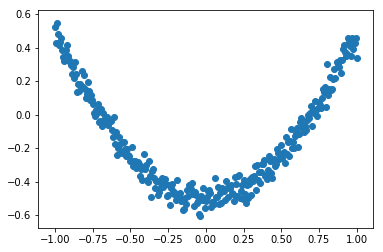

In [7]:
# Create some data

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05, x_data.shape)
y_data = np.square(x_data)-0.5+noise


plt.scatter(x_data, y_data)
plt.show()

In [8]:
#define placeholder to input to network
xs = tf.placeholder(tf.float32,[None,1])     # None for no of sample as not defined and 1 for number 
                                            #of feature in x_data as there is only 1 (300) during creation
ys = tf.placeholder(tf.float32,[None,1])

In [ ]:
#add hidden layer

